In [27]:
import numpy as np

In [28]:
phases = []

In [33]:
start = 0.002000 # mkm
stop = 0.040000 # mkm
step = 0.002000 # mkm

distances = np.arange(start, stop + step, step)
for dz in distances:
    path = f'../TIE/retrieved_phases/small_bmstu_phase_noise_intensity/BMSTU_phase_dz=-{dz*1000:.4f}mm.npy'
    phase = np.load(path)
    phases.append(phase)

In [39]:
from scipy.ndimage import convolve

def prewitt_matrix(array):
    kernelx = np.array([
        [+1, 0, -1],
        [+1, 0, -1],
        [+1, 0, -1],
    ])
    kernely = np.array([
        [+1, +1, +1],
        [ 0,  0,  0],
        [-1, -1, -1],
    ])

    x = np.abs(convolve(array, kernelx))
    y = np.abs(convolve(array, kernely))

    result = np.sqrt(x ** 2 + y ** 2)
    return result

powers = []
for phase in phases:
    powers.append(np.sum(prewitt_matrix(phase)))

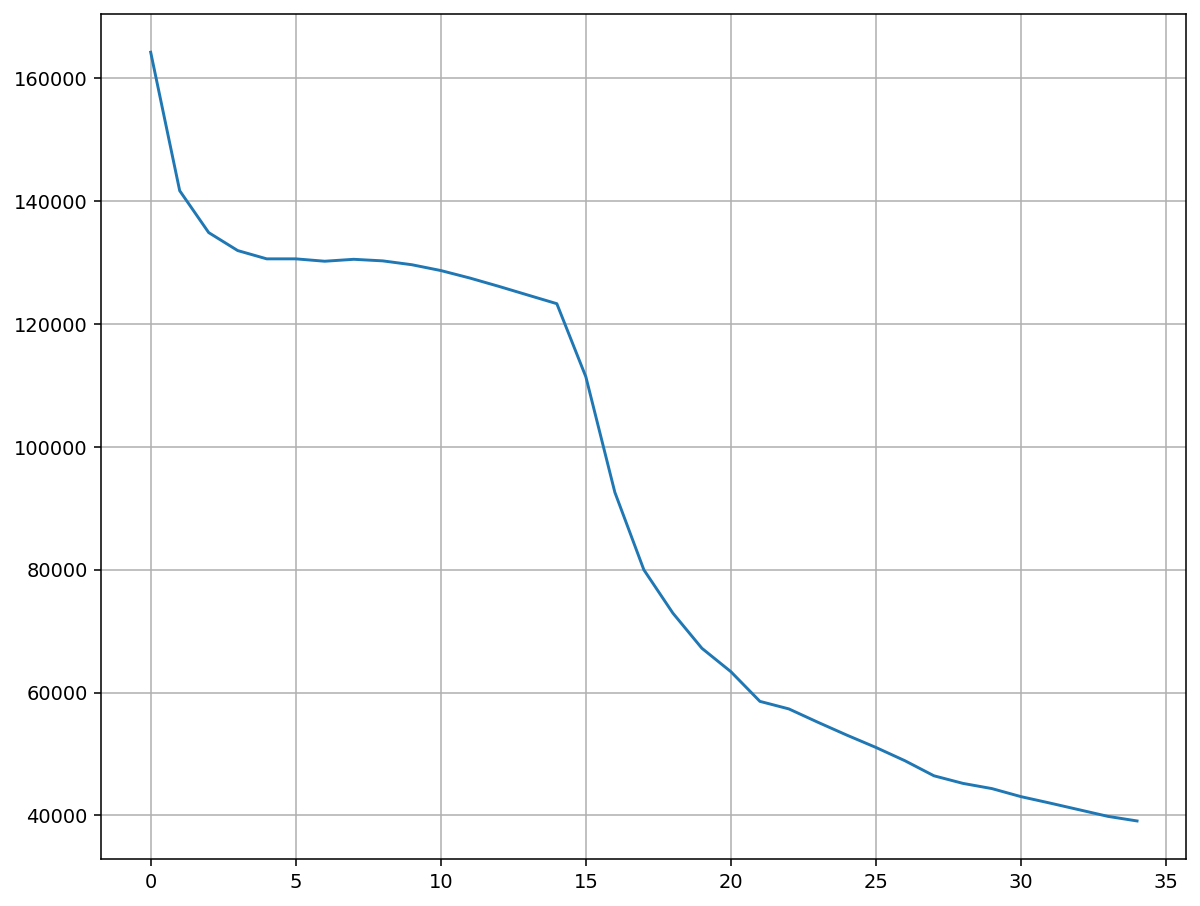

In [40]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 8), dpi=140)
plt.plot(powers)
plt.grid(True)
plt.show()